<a href="https://colab.research.google.com/github/omid-bakeri/dl_cifar10/blob/main/dl_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# convolutional neural network (CNN)
# import library
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.utils import to_categorical

In [ ]:
# download dataset cifar10
(train_features , train_labels) , (test_features , test_labels) = cifar10.load_data()


170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# shape and reshape

print (train_features.shape , train_labels.shape)
print (test_features.shape , test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
# normalize data (0 & 1)
# 0 255 (rgb)

train_features = train_features.astype('float32')
test_features = test_features.astype('float32')

train_features = train_features/255.0
test_features = test_features/255.0

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


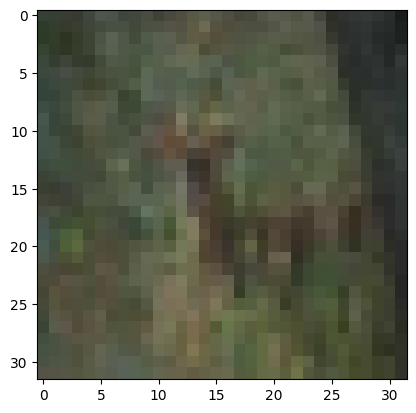

In [ ]:
# one hot encoding

plt.imshow(train_features[10])
print (train_labels[10])


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# create model
# CNN

model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=16 , kernel_size=(4 , 4) , padding='same' , activation='relu' , input_shape=train_features.shape[1:]))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=32 , kernel_size=(4 , 4) , padding='same' , activation='relu' ,))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=64 , kernel_size=(4 , 4) , padding='same' , activation='relu' ,))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=128 , kernel_size=(4 , 4) , padding='same' , activation='relu' ,))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
# hidden layers
model.add(keras.layers.Dense(units=64 , activation='relu' ))
model.add(keras.layers.Dense(units=64 , activation='relu' ))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=10 , activation='softmax' ))


In [ ]:
# model compile
model.summary()

model.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        784       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 batch_normalization (Batch  (None, 16, 16, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        8224      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 32)         

In [ ]:
# model train

history = model.fit(train_features , train_labels , batch_size=128 , epochs=10 , validation_data=(test_features , test_labels))

Epoch 1/10
391/391 [==============================] - 108s 272ms/step - loss: 1.4940 - accuracy: 0.4529 - val_loss: 1.5370 - val_accuracy: 0.4619
Epoch 2/10
391/391 [==============================] - 107s 274ms/step - loss: 1.2907 - accuracy: 0.5347 - val_loss: 1.5610 - val_accuracy: 0.4816
Epoch 3/10
391/391 [==============================] - 116s 297ms/step - loss: 1.1653 - accuracy: 0.5830 - val_loss: 1.2256 - val_accuracy: 0.5708
Epoch 4/10
391/391 [==============================] - 104s 267ms/step - loss: 1.0826 - accuracy: 0.6153 - val_loss: 1.2520 - val_accuracy: 0.5371
Epoch 5/10
391/391 [==============================] - 109s 280ms/step - loss: 1.0124 - accuracy: 0.6451 - val_loss: 0.9497 - val_accuracy: 0.6674
Epoch 6/10
391/391 [==============================] - 104s 265ms/step - loss: 0.9617 - accuracy: 0.6609 - val_loss: 0.9866 - val_accuracy: 0.6462
Epoch 7/10
391/391 [==============================] - 104s 265ms/step - loss: 0.9268 - accuracy: 0.6771 - val_loss: 0.8545 -

In [ ]:
# validation and check train result

for key , value in history.history.items():
  print(key , value)

loss [1.4939898252487183, 1.2907280921936035, 1.1653484106063843, 1.0826283693313599, 1.0124391317367554, 0.961740255355835, 0.9268296957015991, 0.8912962675094604, 0.8690269589424133, 0.8357191681861877]
accuracy [0.4528999924659729, 0.5346599817276001, 0.5830199718475342, 0.6152999997138977, 0.6450999975204468, 0.6608999967575073, 0.6771399974822998, 0.6890000104904175, 0.696940004825592, 0.7084000110626221]
val_loss [1.5369712114334106, 1.5609631538391113, 1.225590467453003, 1.251975655555725, 0.9496802687644958, 0.9865630865097046, 0.854464054107666, 0.8938027620315552, 0.845556914806366, 0.896686315536499]
val_accuracy [0.461899995803833, 0.48159998655319214, 0.5708000063896179, 0.5371000170707703, 0.6674000024795532, 0.6462000012397766, 0.6974999904632568, 0.6859999895095825, 0.7091000080108643, 0.6881999969482422]


<Axes: >

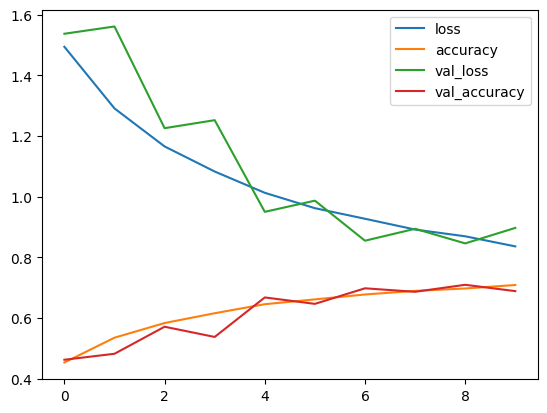

In [ ]:
plot = pd.DataFrame(history.history)
plot.plot()

In [ ]:
# save model

model.save('dl_cifar10')

In [ ]:
# test model

prediction = model.predict(test_features[0:10])




1/1 [==============================] - 0s 29ms/step


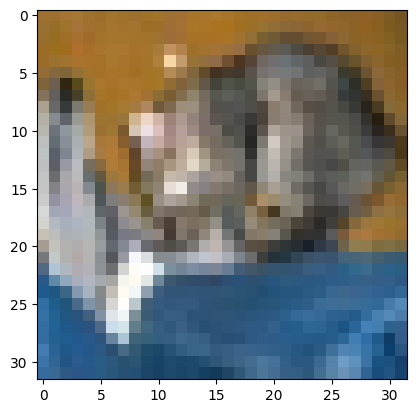

In [ ]:
plt.imshow(test_features[0])

In [ ]:
test_labels[0]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
# confusion matrix
# precision
# recall
# accuracy

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix